# Practica 2 - Perceptrón

El objetivo principal de esta práctica es comprender el funcionamiento del perceptrón como bloque de
construcción elemental de las redes neuronales. Adicionalmente se realiza un repaso sobre el análisis y
preprocesamiento de los datos.

# Imports

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from ClassPerceptron import Perceptron

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

fuentes = '/content/drive/MyDrive/DeepLearning-colab/Fuentes-20240901'

import sys
sys.path.append(fuentes)

Mounted at /content/drive/


#Funciones útiles

In [ ]:
def tipo_de_correlacion(correlacion):
  tipo = 'positiva'
  abs_corr = abs(correlacion)

  if abs_corr < 0:
    tipo = 'negativa'

  if abs_corr <= 0.8 and abs_corr > 0.5:
      return f'Correlación {tipo} débil.'
  if abs_corr > 0.8:
    return f'Correlación {tipo} fuerte.'
  return 'No hay correlacion.'

In [ ]:
def visualizar_cantidad_por_target(df, atributo):
  target = atributo
  barras = df[target].value_counts()
  print(barras)

  plt.figure()
  N = len(barras)
  plt.bar(np.arange( N ), barras)
  plt.title(target)
  plt.ylabel('Frecuencia')

  plt.xticks(np.arange( N ), barras.index)
  plt.show()

# Ejercicio 1 - Hawks.csv

El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados son los siguientes:
* **Epecies**. Es la etiqueta de clase e indica la especie de cada gavilán: gavilanes de Cooper (CH), gavilanes colirrojos (RT) y gavilanes rastreros (SS).
* **Año**. Indica el año en que se avistó el ave.
* **Hallux**. Indica la medida en milímetros del hallux (el dedo posterior del pie, que poseen todas las aves cazadoras para sujetar mejor a sus presas).
* **Ala**. Indica la longitud en milímetros de la pluma más larga del ala.
* **Peso**. Indica el peso del ave en gramos.
* **Cola**. Indica la longitud de la cola del ave en milímetros

##Datos

In [ ]:
hawks = "https://raw.githubusercontent.com/pamelaAHeredia/DeepLearning/main/P2/datos/Hawks.csv"

df_hawks = pd.read_csv(hawks, delimiter=",")

In [ ]:
df_hawks.head()

,Year,Species,Wing,Weight,Tail,Hallux,Coopers?,Red-tailed?,Sharp-shinned?
0,1992,RT,385.0,920.0,219,30.1,0,1,0
1,1992,RT,381.0,990.0,235,31.3,0,1,0
2,1992,CH,265.0,470.0,220,23.5,1,0,0
3,1992,RT,370.0,960.0,212,30.1,0,1,0
4,1992,RT,405.0,1120.0,238,30.2,0,1,0


In [ ]:
df_hawks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            447 non-null    int64  
 1   Species         447 non-null    object 
 2   Wing            447 non-null    float64
 3   Weight          447 non-null    float64
 4   Tail            447 non-null    int64  
 5   Hallux          447 non-null    float64
 6   Coopers?        447 non-null    int64  
 7   Red-tailed?     447 non-null    int64  
 8   Sharp-shinned?  447 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 31.6+ KB


In [ ]:
df_hawks.isnull().sum()

,0
Year,0
Species,0
Wing,0
Weight,0
Tail,0
Hallux,0
Coopers?,0
Red-tailed?,0
Sharp-shinned?,0


In [ ]:
df_hawks.duplicated().sum()

0

##1.a Correlación lineal

Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa)

In [ ]:
correlacion = df_hawks['Wing'].corr(df_hawks['Tail'])


0.9117653735851496

In [ ]:
print(df_hawks['Wing'].corr(df_hawks['Hallux']))
print(df_hawks['Wing'].corr(df_hawks['Weight']))
print(df_hawks['Tail'].corr(df_hawks['Hallux']))
print(df_hawks['Tail'].corr(df_hawks['Weight']))
print(df_hawks['Weight'].corr(df_hawks['Hallux']))

0.6788490044375617
0.9418050995974143
0.6576956784297723
0.8861959911107155
0.6896084087145989


In [ ]:
print(tipo_de_correlacion(correlacion))

Correlación positiva fuerte.


In [ ]:
px.scatter(df_hawks, x='Wing', y='Tail')

La correlación lineal entre los atributos es de 0.9117,indicando una correlación fuerte (valor absoluto mayor a 0.8), positiva. Esto se puede apreciar en el gráfico, donde vemos que a medida que aumenta el tamaño de las alas, aumenta el tamaño de la cola.

##1.b

Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media y desvío.

In [ ]:
df_hallux = df_hawks['Hallux']

In [ ]:
df_hallux.describe()

,Hallux
count,447.000000
mean,25.799441
std,10.601582
min,9.600000
25%,15.150000
50%,29.500000
75%,31.500000
max,130.000000


In [ ]:
df_hallux_norm = (df_hallux - df_hallux.mean()) / df_hallux.std()

df_hallux_norm.describe()

,Hallux
count,4.470000e+02
mean,2.702288e-16
std,1.000000e+00
min,-1.528021e+00
25%,-1.004514e+00
50%,3.490573e-01
75%,5.377083e-01
max,9.828774e+00


In [ ]:
ric = 31.500000 - 15.150000
norm_ric = 5.377083e-01 - (-1.004514e+00)

print(f'RIC: {ric}')
print(f'Atípicos leves: {15.150000 - 1.5 * ric}')
print(f'Atípicos extremos: {31.500000 + 3* ric}')

print(f'RIC normalizado: {norm_ric}')
print(f'Atípicos leves: {-1.004514e+00 - 1.5 * norm_ric}')
print(f'Atípicos extremos: {5.377083e-01 + 3* norm_ric}')

RIC: 16.35
Atípicos leves: -9.375000000000002
Atípicos extremos: 80.55000000000001
RIC normalizado: 1.5422223
Atípicos leves: -3.31784745
Atípicos extremos: 5.1643752


###Tabla:

| Medida        | Sin normalizar| Normalizado |
| ------------- | :-------------: |:-------------:|
| **Media**     | 25.799441     | 2.702288e-16|
| **Desvío**      | 10.601582 | 1.000000e+00|
| **Mínimo**        | 9.600000 | -1.528021e+00|
| **Q1**            | 15.150000 | -1.004514e+00|
| **Q2**            | 29.500000 | 3.490573e-01|
| **Q3**            | 31.500000 | 5.377083e-01|
| **RIC**           | 16,35 |       1.5422223   |
| **Max**           | 130.000000 | 9.828774e+00|
| **Bigote inferior** | 24.525000000000002 |   2.31333345     |
| **Bigote Superior** | 49.050000000000004 | 4.6266669|

Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones:

**I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos.**

  * *Falso.*
  * La media normalizada es 2.702288×10−162.702288×10−16, que es extremadamente cercana a 0.
  * La mediana normalizada es 3.490573×10−13.490573×10−1, lo que equivale a aproximadamente 0.349.
  * Si la media y la mediana tuvieran valores cercanos, esperaría que los valores normalizados fueran similares y estos no lo son, lo que indica que la media y la mediana no tienen valores normalizados.  

**II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.**

  * valor máximo de hallux : 130mm = nro_desvíos * 10.601582 + 25.799441
                            nro_desvíos = (max_hallux - mean) / desvío
                            9.82 = (130 - 25.799441) / 10.601582
                            9.82 > 9

  * Verdadero

III. **Un hallux que mida más de 600 mm es considerado atípico extremo.**  *Verdadero*

**IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.**



**V. En un gavilán es atípico que su hallux mida menos de 100 mm.**

# Ejercicio 2 - Globos.csv

El archivo Globos.csv contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron el color del globo, el tamaño, si se estira o no y si la acción de inflarlo fue realizada por un adulto o por un niño. En cada registro se anotó si el globo pudo ser inflado o no.
Numerice los atributos de la siguiente forma:

* Color = 1 si es rojo y 0 si es amarillo
* Se Estira? = 1 para Si y 0 para No
* Edad = 1 si es adulto y 0 si es Nene
* Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande

## Datos

In [ ]:
globos = 'https://raw.githubusercontent.com/pamelaAHeredia/DeepLearning/main/P2/datos/Globos.csv'

df_globos = pd.read_csv(globos, delimiter=',')

##Exploración inicial

In [ ]:
df_globos.shape

(16, 5)

In [ ]:
df_globos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Color       16 non-null     object
 1   Tamanio     16 non-null     object
 2   Se_estira?  16 non-null     object
 3   Edad        16 non-null     object
 4   Inflado?    16 non-null     object
dtypes: object(5)
memory usage: 768.0+ bytes


In [ ]:
df_globos

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,Amarillo,Chico,Si,Adulto,Si
1,Amarillo,Chico,Si,Niño,Si
2,Amarillo,Chico,No,Adulto,No
3,Amarillo,Chico,No,Niño,No
4,Amarillo,Grande,Si,Adulto,Si
5,Amarillo,Grande,Si,Niño,Si
6,Amarillo,Mediano,No,Adulto,No
7,Amarillo,Mediano,No,Niño,No
8,Rojo,Chico,Si,Adulto,Si
9,Rojo,Chico,Si,Niño,No


In [ ]:
globos_num = pd.DataFrame({})

globos_num['color'] = df_globos['Color'].map({'Rojo':1, 'Amarillo':0})
globos_num['tamanio'] = df_globos['Tamanio'].map({'Chico':0, 'Mediano':1, 'Grande':2})
globos_num['se_estira'] = df_globos['Se_estira?'].map({'Si':1, 'No':0})
globos_num['edad'] = df_globos['Edad'].map({'Adulto':1, 'Niño':0})
globos_num['inflado'] = df_globos['Inflado?'].map({'Si':1, 'No':0})


globos_num

,color,tamanio,se_estira,edad,inflado
0,0,0,1,1,1
1,0,0,1,0,1
2,0,0,0,1,0
3,0,0,0,0,0
4,0,2,1,1,1
5,0,2,1,0,1
6,0,1,0,1,0
7,0,1,0,0,0
8,1,0,1,1,1
9,1,0,1,0,0


In [ ]:
# Normalizar

globos_num['tamanio_norm'] = (globos_num['tamanio'] - globos_num['tamanio'].min()) / (globos_num['tamanio'].max() - globos_num['tamanio'].min())
globos_num

,color,tamanio,se_estira,edad,inflado,tamanio_norm
0,0,0,1,1,1,0.0
1,0,0,1,0,1,0.0
2,0,0,0,1,0,0.0
3,0,0,0,0,0,0.0
4,0,2,1,1,1,1.0
5,0,2,1,0,1,1.0
6,0,1,0,1,0,0.5
7,0,1,0,0,0,0.5
8,1,0,1,1,1,0.0
9,1,0,1,0,0,0.0


inflado
0    10
1     6
Name: count, dtype: int64


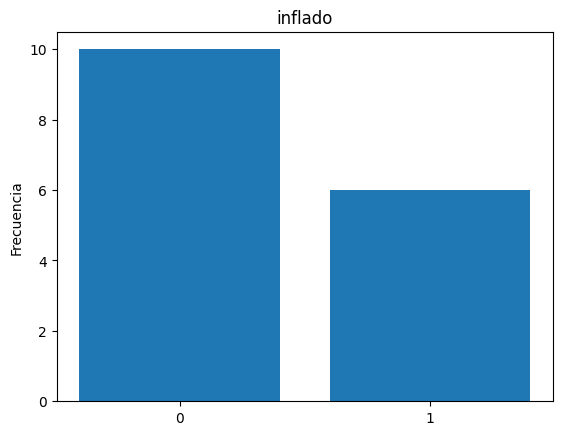

In [ ]:
target = 'inflado'
barras = globos_num[target].value_counts()
print(barras)

plt.figure()
N = len(barras)
plt.bar(np.arange( N ), barras)
plt.title(target)
plt.ylabel('Frecuencia')

plt.xticks(np.arange( N ), barras.index)
plt.show()


In [ ]:
inflados = globos_num[globos_num.inflado == 1]
no_inflados = globos_num[globos_num.inflado == 0]

print(inflados)
print('----------------------------------------------')
print(no_inflados)

    color  tamanio  se_estira  edad  inflado  tamanio_norm
0       0        0          1     1        1           0.0
1       0        0          1     0        1           0.0
4       0        2          1     1        1           1.0
5       0        2          1     0        1           1.0
8       1        0          1     1        1           0.0
12      1        2          1     1        1           1.0
----------------------------------------------
    color  tamanio  se_estira  edad  inflado  tamanio_norm
2       0        0          0     1        0           0.0
3       0        0          0     0        0           0.0
6       0        1          0     1        0           0.5
7       0        1          0     0        0           0.5
9       1        0          1     0        0           0.0
10      1        1          0     1        0           0.5
11      1        1          0     0        0           0.5
13      1        2          1     0        0           1.0
14      1

## 2.a

Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo Globos.csv

<br>

|Configuración|w(color)|w(tamanio)|w(se_estira?)|w(edad)|b   |
|-------------|--------|----------|-------------|-------|----|
|Perceptrón 1|0,050|0,006|-0,068|-0,047|0,005|
|Perceptrón 2|-0,494|-0.003|0,722|0,489|-0.4943|
|Perceptrón 3|0,06|0,004|0,1278|0,021|-0,1132|
|Perceptrón 4|0,296|0,026|-0,576|-0,287|0,371|
|Perceptrón 5|0,994|0,006|-1,466|-0,989|0,988|


<br>
<br>
**El perceptrón 2 clasifica correctamente todos los ejemplos.**

Los atributos con mayor peso, que clasifican a un atributo como positivo, son 'se_estira?' y 'edad'.

Criterio para el perceptrón clasifique como 1:
* 'Se_estira' tiene valor = 1, y color = 0
* 'Se_estira' y 'Edad' = 1.



##2.b

Indique cuál de los 5 perceptrones del inciso anterior presenta el peor desempeño, es decir, cuál es el que clasifica la menor cantidad de ejemplos correctamente.

**El perceptrón 3 y el perceptrón 5 clasifican correctamente 1 solo ejemplo cada uno.**

* Perceptrón 3: La única manera de que la salida sea 0 es cuando todos los ejemplos de entrada tienen valor 0.

* Perceptrón 5: si edad y se_estira = 1, la salida seguro es 0.

# Ejercicio 3 - pacientes

La Tabla 1 muestra información correspondiente de pacientes para determinar si deben realizarse un examen médico en función de su edad, altura y riesgo médico.

Donde:
* EDAD es un atributo numérico que indica la edad del paciente.
* RIESGO es el nivel de riesgo del paciente.
* EXAMEN indica si debe realizarse un examen extra.

Para obtener transformar el atributo nominal RIESGO en uno
numérico se lo numerizó de la siguiente forma: BAJO = 1, MEDIO = 2 y
ALTO = 3

## Tabla y visualización de atributos

In [ ]:
tabla1 = {
    'EDAD': [55,56,58,56,59,57,60,53,59],
    'RIESGO':['ALTO','MEDIO','MEDIO','BAJO','BAJO','MEDIO','BAJO','ALTO', 'MEDIO'],
    'EXAMEN':['SI','NO','SI','NO','NO','SI','SI','NO','SI']
}

In [ ]:
df_tabla = pd.DataFrame(tabla1)

In [ ]:
df_tabla

,EDAD,RIESGO,EXAMEN
0,55,ALTO,SI
1,56,MEDIO,NO
2,58,MEDIO,SI
3,56,BAJO,NO
4,59,BAJO,NO
5,57,MEDIO,SI
6,60,BAJO,SI
7,53,ALTO,NO
8,59,MEDIO,SI


##Ejercicio 3.a

In [ ]:
# Numerización del atributo riesgo

df_tabla['RIESGO_NUM'] = df_tabla['RIESGO'].map({'BAJO': 1, 'MEDIO': 2, 'ALTO': 3})

df_tabla

,EDAD,RIESGO,EXAMEN,RIESGO_NUM
0,55,ALTO,SI,3
1,56,MEDIO,NO,2
2,58,MEDIO,SI,2
3,56,BAJO,NO,1
4,59,BAJO,NO,1
5,57,MEDIO,SI,2
6,60,BAJO,SI,1
7,53,ALTO,NO,3
8,59,MEDIO,SI,2


In [ ]:
df_tabla.EDAD.corr(df_tabla.RIESGO_NUM)

-0.7150969419341943

**Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor?**

Si calculamos el valor absoluto, obtenemos que es mayor a 0.5 y menor a 0.8, lo que califica como 'Correlación lineal débil.'

## Ejercicio 3.b

Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo EXAMEN. Los pesos obtenidos fueron los siguientes:

* W(EDAD) = 0.0807
* W(RIESGO) = 0.074
* Sesgo o bias = -0.0742

¿Cuál será la respuesta del perceptrón para los siguientes valores?
(EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO)

In [ ]:
# Normalización de atributos

df_tabla['EDAD_NORM'] = (df_tabla.EDAD - df_tabla.EDAD.min()) / (df_tabla.EDAD.max()- df_tabla.EDAD.min())
df_tabla['RIESGO_NORM'] = (df_tabla.RIESGO_NUM - df_tabla.RIESGO_NUM.min()) / (df_tabla.RIESGO_NUM.max() - df_tabla.RIESGO_NUM.min())
df_tabla

,EDAD,RIESGO,EXAMEN,RIESGO_NUM,EDAD_NORM,RIESGO_NORM
0,55,ALTO,SI,3,0.285714,1.0
1,56,MEDIO,NO,2,0.428571,0.5
2,58,MEDIO,SI,2,0.714286,0.5
3,56,BAJO,NO,1,0.428571,0.0
4,59,BAJO,NO,1,0.857143,0.0
5,57,MEDIO,SI,2,0.571429,0.5
6,60,BAJO,SI,1,1.000000,0.0
7,53,ALTO,NO,3,0.000000,1.0
8,59,MEDIO,SI,2,0.857143,0.5


In [ ]:
def calcular_salida(edad,riesgo):
  salida = 0.0807*edad + 0.074*riesgo +(-0.0742)
  if salida >= 0:
    return 'SI'
  else:
    return 'NO'

def normalizar_edad(edad):
  return (edad -53)/(60-53)

In [ ]:
print(f'Para las entradas (50,BAJO) la salida es: {calcular_salida(normalizar_edad(53),0)}')
print(f'Para las entradas (51,MEDIO) la salida es: {calcular_salida(normalizar_edad(51),0.5)}')
print(f'Para las entradas (54,ALTO) la salida es: {calcular_salida(normalizar_edad(54),1)}')


Para las entradas (50,BAJO) la salida es: NO
Para las entradas (51,MEDIO) la salida es: NO
Para las entradas (54,ALTO) la salida es: SI


In [ ]:
# Prueba

print(f'(55,ALTO) la salida es: {calcular_salida(normalizar_edad(55),1)}')
print(f'(56,MEDIO) la salida es: {calcular_salida(normalizar_edad(56),0.5)}')
print(f'(58,MEDIO) la salida es: {calcular_salida(normalizar_edad(58),0.5)}')
print(f'(56,BAJO) la salida es: {calcular_salida(normalizar_edad(56),0)}')
print(f'(59,BAJO) la salida es: {calcular_salida(normalizar_edad(59),0)}')
print(f'(57,MEDIO) la salida es: {calcular_salida(normalizar_edad(57),0.5)}')
print(f'(60,BAJO) la salida es: {calcular_salida(normalizar_edad(60),0)}')
print(f'(53,ALTO) la salida es: {calcular_salida(normalizar_edad(53),1)}')
print(f'(59,MEDIO) la salida es: {calcular_salida(normalizar_edad(59),0.5)}')

(55,ALTO) la salida es: SI
(56,MEDIO) la salida es: NO
(58,MEDIO) la salida es: SI
(56,BAJO) la salida es: NO
(59,BAJO) la salida es: NO
(57,MEDIO) la salida es: SI
(60,BAJO) la salida es: SI
(53,ALTO) la salida es: NO
(59,MEDIO) la salida es: SI


# Ejercicio 4 - Drug_test.csv

# Ejercicio 5 - SEMILLAS.csv

El archivo SEMILLAS.csv contiene información de granos que pertenecen a tres variedades diferentes de trigo: Kama, Rosa y Canadiense. El total es de 210 ejemplos a razón de 70 ejemplos para cada tipo de grano, seleccionados al azar para el experimento. La información registrada corresponde al resultado de la visualización de alta calidad de la estructura interna del núcleo efectuada utilizando una técnica de rayos X blandos. Este tipo de estudio no es destructivo y es considerablemente más económico que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron en placas KODAK de rayos x de 13x18 cm. Los estudios se realizaron utilizando granos de trigo cosechados combinados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia Polaca de Ciencias en Lublin. Para construir los datos, se midieron siete parámetros geométricos de cada grano de trigo:

* área A
* perímetro P
* compacidad C = 4 * pi * A / P ^ 2
* longitud del núcleo
* ancho del núcleo
* coeficiente de asimetría
* longitud del surco del núcleo


## Datos

In [ ]:
archivo_semillas = "https://raw.githubusercontent.com/pamelaAHeredia/DeepLearning/main/P2/datos/Semillas.csv"

In [ ]:
semillas = pd.read_csv(archivo_semillas, delimiter=",")

In [ ]:
semillas

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Tipo3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Tipo3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Tipo3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Tipo3


In [ ]:
semillas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         210 non-null    float64
 1   Perimetro    210 non-null    float64
 2   Compacidad   210 non-null    float64
 3   LongNucleo   210 non-null    float64
 4   AnchoNucleo  210 non-null    float64
 5   Asimetria    210 non-null    float64
 6   LongSurco    210 non-null    float64
 7   Clase        210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [ ]:
target = 'Clase'
barras = semillas[target].value_counts()
print(barras)

Clase
Tipo1    70
Tipo2    70
Tipo3    70
Name: count, dtype: int64


## 5.a
A partir de los 210 ejemplos, luego de normalizarlos utilizando los valores de media y desvío, se logró entrenar un perceptrón capaz de identificar, con una precisión del 100%, uno de los tres tipos de semillas. Para realizar el entrenamiento se utilizó una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones. Indique cuál es el tipo de semilla que puede ser reconocido correctamente por un perceptrón.

**La semilla de tipo 2 es reconocida correctamente por el perceptrón.**

In [ ]:
# Datos de entrenamiento y etiquetas

datos = semillas.drop(['Clase'], axis=1)
tipo1 = (semillas['Clase'] == 'Tipo1')*1
tipo2 = (semillas['Clase'] == 'Tipo2')*1
tipo3 = (semillas['Clase'] == 'Tipo3')*1

In [ ]:
datos.columns

Index(['Area', 'Perimetro', 'Compacidad', 'LongNucleo', 'AnchoNucleo',
       'Asimetria', 'LongSurco'],
      dtype='object')

In [ ]:
datos_norm = pd.DataFrame({})
datos['Area'] = (datos.Area - datos['Area'].mean()) / datos['Area'].std()
datos['Perimetro'] = (datos['Perimetro'] - datos['Perimetro'].mean()) / datos['Perimetro'].std()
datos['Compacidad'] = (datos['Compacidad'] - datos['Compacidad'].mean()) / datos['Compacidad'].std()
datos['LongNucleo'] = (datos['LongNucleo'] - datos['LongNucleo'].mean()) / datos['LongNucleo'].std()
datos['AnchoNucleo'] = (datos['AnchoNucleo'] - datos['AnchoNucleo'].mean()) / datos['AnchoNucleo'].std()
datos['Asimetria'] = (datos['Asimetria'] - datos['Asimetria'].mean()) / datos['Asimetria'].std()
datos['LongSurco'] = (datos['LongSurco'] - datos['LongSurco'].mean()) / datos['LongSurco'].std()

In [ ]:
# Entrenamiento
alfa = 0.05
max_itera = 200
dibujar = True


In [ ]:
modelo1 = Perceptron(alpha=alfa, n_iter=max_itera, draw=dibujar, title=datos.columns)
modelo1.fit(datos.values, tipo1)

y1 = modelo1.predict(datos)

accuracy = (y1 == tipo1).sum()*100/len(tipo1)
iter = len(modelo1.errors_)

print(f'Accuracy:{accuracy} \nIter:{iter} \nPesos:{modelo1.w_} \nBias:{modelo1.b_} ')

Accuracy:87.14285714285714 
Iter:200 
Pesos:[-0.80986355  0.4308755   0.28819073  1.61075115 -0.03730244 -0.12260075
 -1.27144346] 
Bias:-0.31148799428995005 


In [ ]:
modelo2 = Perceptron(alpha=alfa, n_iter=max_itera, draw=dibujar, title=datos.columns)
modelo2.fit(datos.values, tipo2)
y2 = modelo2.predict(datos)

accuracy = (y2 == tipo2).sum()*100/len(tipo2)
iter = len(modelo2.errors_)

print(f'Accuracy:{accuracy} \nIter:{iter} \nPesos:{modelo2.w_} \nBias:{modelo2.b_} ')

Accuracy:100.0 
Iter:43 
Pesos:[ 0.3899626   0.21309853 -0.12726505 -0.55937486  0.15958106  0.11875264
  0.43253635] 
Bias:-0.207681351226221 


In [ ]:
modelo3 = Perceptron(alpha=alfa, n_iter=max_itera, draw=dibujar, title=datos.columns)
modelo3.fit(datos.values, tipo2)
y3 = modelo3.predict(datos)

accuracy = (y3 == tipo3).sum()*100/len(tipo3)
iter = len(modelo3.errors_)

print(f'Accuracy:{accuracy} \nIter:{iter} \nPesos:{modelo3.w_} \nBias:{modelo3.b_} ')

Accuracy:33.333333333333336 
Iter:67 
Pesos:[ 0.59540636  0.34637665 -0.13531428 -0.65511472 -0.02439761  0.174459
  0.45047751] 
Bias:-0.185180953829838 


# Ejercicio 6 - Zoo.csv

El archivo Zoo.csv contiene información de 101 animales caracterizados por los siguientes atributos:

* A1. Nombre del animal
* A2. Tiene Pelo
* A3. Plumas
* A4. Huevos
* A5. Leche
* A6. Vuela
* A7. Acuático
* A8. Depredador
* A9. Dentado
* A10. Vertebrado
* A11. Branquias
* A12. Venenoso
* A13. Aletas
* A14. Patas
* A15. Cola
* A16. Domestico
* A17. Tamaño gato
* A18. Clase

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

##Datos

In [ ]:
archivo_zoo = "/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/zoo.csv"

In [ ]:
import chardet

with open(archivo_zoo, 'rb') as f:
    result = chardet.detect(f.read())

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
zoo = pd.read_csv(archivo_zoo, encoding=result['encoding'])

In [ ]:
zoo.head()

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   animal         101 non-null    object
 1   Tiene_Pelo     101 non-null    int64 
 2   Tiene_Plumas   101 non-null    int64 
 3   Nace_de_huevo  101 non-null    int64 
 4   Toma_Leche     101 non-null    int64 
 5   Vuela          101 non-null    int64 
 6   Acuatico       101 non-null    int64 
 7   Depredador     101 non-null    int64 
 8   Dentado        101 non-null    int64 
 9   Vertebrado     101 non-null    int64 
 10  Respira        101 non-null    int64 
 11  Venenoso       101 non-null    int64 
 12  Tiene_Aletas   101 non-null    int64 
 13  Cant_Patas     101 non-null    int64 
 14  Tiene_Cola     101 non-null    int64 
 15  Domestico      101 non-null    int64 
 16  Tamano_Gato    101 non-null    int64 
 17  Clase          101 non-null    object
dtypes: int64(16), object(2)
memory

##6.a

Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice que tipos de problema podrían surgir al entrenar un modelo para clasificación.

Clase
Mamifero        41
Ave             20
Pez             13
Invertebrado    10
Insecto          8
Reptil           5
Anfibio          4
Name: count, dtype: int64


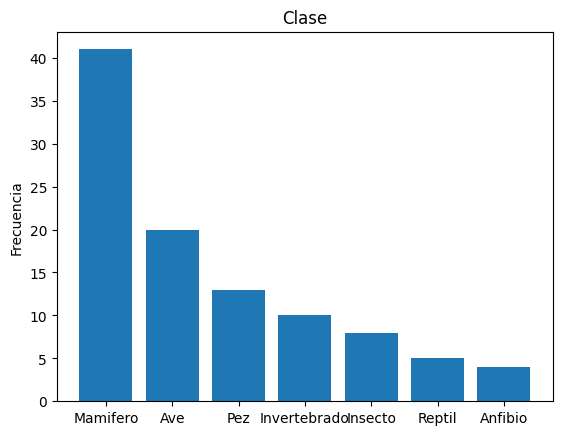

In [ ]:
visualizar_cantidad_por_target(zoo, 'Clase')

La clase mamífero tiene muchos más ejemplos que las demás clases, lo que puede llevar al perceptrón a elegirla por sobre las demás, clasificando de manera incorrecta.

##6.b

Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.

In [ ]:
datos = zoo.drop(['Clase', 'animal'], axis=1)
etiqueta = (zoo['Clase'] == 'Mamifero')*1


In [ ]:
alfa = 0.05
max_itera = 200

modelo = Perceptron(alpha=alfa, n_iter=max_itera, title=datos.columns)
modelo.fit(datos.values,etiqueta)

y=modelo.predict(datos)

In [ ]:
accuracy=(y==etiqueta).sum()*100/len(etiqueta)
iter=len(modelo.errors_)

print(f'Accuracy: {accuracy}, \nIteraciones:{iter}, \nPesos: {modelo.w_}, \nBias: {modelo.b_}')

Accuracy: 100.0, 
Iteraciones:4, 
Pesos: [ 0.1673842  -0.20526109 -0.43388999  0.82650513 -0.27403395  0.02129068
 -0.07566862  0.03512675 -0.28117714  0.13954646 -0.25375601 -0.32173216
 -0.17029069  0.05563904 -0.19545308  0.07177694], 
Bias: 0.2738736647140723


##6.c

Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y observe si las características más relevantes siguen siendo las mismas.

**Características más relevantes:**

* Tiene_pelo
* Toma_leche
* Tiene_cola
* Doméstico
* Tamaño_gato

##6.d

Repita b) y c) para las aves.

In [ ]:
aves = (zoo['Clase'] == 'Ave')*1

In [ ]:
modelo_aves = Perceptron(alpha=alfa, n_iter=max_itera, title=datos.columns)
modelo_aves.fit(datos.values,aves)

y=modelo_aves.predict(datos)

In [ ]:
accuracy = (y == aves).sum()*100/len(aves)
iter = len(modelo_aves.errors_)

print(f'Accuracy: {accuracy} \nIteraciones: {iter}, \nPesos: {modelo_aves.w_} \nBias: {modelo_aves.b_}')

Accuracy: 100.0 
Iteraciones: 5, 
Pesos: [ 0.18160677  0.53939904  0.18183431  0.12635926  0.21284223 -0.22153893
  0.12982765 -0.68327124  0.4829948  -0.05975732  0.27233409 -0.30642077
 -0.11103975  0.03803488 -0.17682023 -0.00905816] 
Bias: -0.44464429695610713


**Características más relevantes:**

* Tiene_plumas
* Nace_de_huevo
* Vuela
* Es_acuático
* Es_dentado
* Vertebrado
* Respira
* Tiene_cola
* Doméstico
* Tamanio_gato

##6.e

Repita b) y c) para los reptiles.

In [ ]:
reptiles = (zoo['Clase'] == 'Reptil')*1

modelo_reptiles = Perceptron(alpha=alfa, n_iter=max_itera, title=datos.columns)
modelo_reptiles.fit(datos.values,reptiles)

y=modelo_reptiles.predict(datos)

accuracy = (y == reptiles).sum()*100/len(reptiles)
iter = len(modelo_reptiles.errors_)

print(f'Accuracy: {accuracy} \nIteraciones: {iter}, \nPesos: {modelo_reptiles.w_} \nBias: {modelo_reptiles.b_}')

Accuracy: 100.0 
Iteraciones: 32, 
Pesos: [-0.75179511 -0.65937872  0.05087112 -0.59977535 -0.53160719 -0.51041202
 -0.09531844  0.02107723  0.45416533 -0.1286128   0.2163971  -0.57965285
 -0.12169588  0.40853703 -0.29975966  0.14823805] 
Bias: -0.1720858118987393


**Características más relevantes**

* Nace_de_huevo
* Es_dentado
* Vertebrado
* Venenoso
* Tiene_cola
* Tamanio_gato

# Ejercicio 7 - automobile-simple.csv

El archivo automobile-simple.csv contiene 11 atributos de automóviles de un total de 205 registros. Es una versión modificada y simplificada del dataset disponible en el repositorio UCI https://archive.ics.uci.edu/ml/datasets/Automobile. La siguiente tabla contiene una breve descripción de los atributos que contiene el archivo y caracterizan a cada vehículo.

##Datos

In [3]:
automobile_archivo = "/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/automobile-simple.csv"

In [4]:
auto = pd.read_csv(automobile_archivo, delimiter=',')

In [ ]:
auto.head()

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         201 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB


In [ ]:
auto.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'curb-weight',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price',
       'volume', 'eco-rating'],
      dtype='object')

## 7.a

Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal.

**Discretas**
* 'city-mpg'
* 'highway-mpg'
* 'horsepower'
* 'curb-weight'
* 'engine-size'

**Continuas**

* 'price',
* 'volume'
* 'eco-rating'

**Nominal**
* 'make'
* 'body-style'
* 'fuel-type'

**Ordinal**
* 'num-of-doors'

##7.b

b) Elimine los registros que presenten valores faltantes.


In [ ]:
auto.isnull().sum()

,0
make,0
fuel-type,0
num-of-doors,2
body-style,0
curb-weight,0
engine-size,0
horsepower,2
city-mpg,0
highway-mpg,0
price,4


In [ ]:
auto.loc[auto['num-of-doors'].isnull()]

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
27,dodge,gas,NaN,sedan,2191,98,102.0,24,30,8558.0,507808.444,39.928042
63,mazda,diesel,NaN,sedan,2443,122,64.0,36,42,10795.0,656215.350,58.666739


In [ ]:
auto.loc[auto['horsepower'].isnull()]

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
130,renault,gas,four,wagon,2579,132,NaN,23,31,9295.0,666250.20,41.773741
131,renault,gas,two,hatchback,2460,132,NaN,23,31,9895.0,594631.44,40.619311


In [ ]:
auto.loc[auto['price'].isnull()]

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
9,audi,gas,two,hatchback,3053,131,160.0,16,22,NaN,629188.560,25.008890
44,isuzu,gas,two,sedan,1874,90,70.0,38,43,NaN,515592.480,65.105613
45,isuzu,gas,four,sedan,1909,90,70.0,38,43,NaN,515592.480,64.755162
129,porsche,gas,two,hatchback,3366,203,288.0,17,28,NaN,641507.055,29.678270


In [ ]:
auto.shape

(205, 12)

In [5]:
auto = auto.dropna()

auto.isnull().sum()

,0
make,0
fuel-type,0
num-of-doors,0
body-style,0
curb-weight,0
engine-size,0
horsepower,0
city-mpg,0
highway-mpg,0
price,0


In [ ]:
auto.shape

(197, 12)

7.c

c) Calcule la matriz de correlación usando los atributos numéricos.


In [6]:
atrib_numericos = auto.select_dtypes(include = [np.number])
atrib_numericos

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...
200,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,3217,145,106.0,26,27,22470.0,721961.760,35.073342


In [ ]:
matrix_corr = atrib_numericos.corr()
matrix_corr

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
curb-weight,1.000000,0.848932,0.759925,-0.755559,-0.800113,0.834732,0.822823,-0.842957
engine-size,0.848932,1.000000,0.825286,-0.655737,-0.684662,0.873708,0.592571,-0.723965
horsepower,0.759925,0.825286,1.000000,-0.821960,-0.803658,0.811953,0.449278,-0.839619
city-mpg,-0.755559,-0.655737,-0.821960,1.000000,0.972407,-0.692948,-0.554978,0.976650
highway-mpg,-0.800113,-0.684662,-0.803658,0.972407,1.000000,-0.708659,-0.608072,0.984258
price,0.834732,0.873708,0.811953,-0.692948,-0.708659,1.000000,0.631578,-0.747982
volume,0.822823,0.592571,0.449278,-0.554978,-0.608072,0.631578,1.000000,-0.598520
eco-rating,-0.842957,-0.723965,-0.839619,0.976650,0.984258,-0.747982,-0.598520,1.000000


7.d

Realice el entrenamiento de un perceptrón para que aprenda a clasificar si un auto es ecológico. Tenga en cuenta los siguientes pasos:

<br>
I. Utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es
ecológico o no. Un auto es considerado ecológico si el valor de eco-rating supera la media de dicho atributo.

<br>
II. Genere y compare 3 modelos utilizando diferentes normalizaciones (Sin normalizar, normalización lineal, normalización estándar.

<br>
III. Teniendo en cuenta la matriz de correlación del punto c) repita el punto II) eliminando dos atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexione sobre los resultados obtenidos.

In [7]:
eco_mean = atrib_numericos['eco-rating'].mean()
atrib_numericos['binary-eco-rating'] = (atrib_numericos['eco-rating'] > eco_mean)*1

atrib_numericos

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,binary-eco-rating
0,2548,130,111.0,21,27,13495.0,528019.904,33.297462,0
1,2548,130,111.0,21,27,16500.0,528019.904,33.297462,0
2,2823,152,154.0,19,26,16500.0,587592.640,30.898272,0
3,2337,109,102.0,24,30,13950.0,634816.956,42.697819,1
4,2824,136,115.0,18,22,17450.0,636734.832,27.997459,0
...,...,...,...,...,...,...,...,...,...
200,2952,141,114.0,23,28,16845.0,721961.760,38.354298,0
201,3049,141,160.0,19,25,19045.0,720913.920,32.043335,0
202,3012,173,134.0,18,23,21485.0,721961.760,29.806494,0
203,3217,145,106.0,26,27,22470.0,721961.760,35.073342,0


In [25]:
datos_autos = atrib_numericos.drop('binary-eco-rating', axis=1)
etiqueta_autos = atrib_numericos['binary-eco-rating'] == 1

###7.II) Sin normalizar

In [57]:
alfa = 0.1
max_iter = 500

In [58]:
modelo_autos = Perceptron(alpha=alfa, n_iter=max_iter, title=datos_autos.columns)
modelo_autos.fit(datos_autos.values, etiqueta_autos)
y = modelo_autos.predict(datos_autos)

acc = (y==etiqueta_autos).sum()*100/len(etiqueta_autos)
iter = len(modelo_autos.errors_)

print(f'Accuracy: {acc} \nIteraciones: {iter} \nPesos: {modelo_autos.w_ } \nBias: {modelo_autos.b_}')

Accuracy: 52.79187817258883 
Iteraciones: 500 
Pesos: [ -267783.15220419   -17066.15727298   -30173.19704753    10072.84386351
    11106.26962757 -2863995.88831905    12426.04479637    18802.45725922] 
Bias: 53.729974624929994


### **Nota sobre el modelo:**

* Con una velocidad de aprendizaje de 0.05 y 500 iteraciones, tiene una tasa de aciertos de. 52,79%
* Con una velocidad de aprendizaje de 0.5 y 500 iteraciones, la tasa de aciertos no mejora.

Es el **modelo que peor desempeño tiene**, de los 3.

###7.II) Normalización Lineal

In [36]:
norm_lineal = pd.DataFrame({})
for col in atrib_numericos.columns:
  min = atrib_numericos[col].min()
  max = atrib_numericos[col].max()
  norm_lineal[col] = (atrib_numericos[col] - min) / (max - min)

norm_lineal

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,binary-eco-rating
0,0.411171,0.260377,0.294393,0.222222,0.289474,0.207959,0.191621,0.263298,0.0
1,0.411171,0.260377,0.294393,0.222222,0.289474,0.282558,0.191621,0.263298,0.0
2,0.517843,0.343396,0.495327,0.166667,0.263158,0.282558,0.343065,0.227801,0.0
3,0.329325,0.181132,0.252336,0.305556,0.368421,0.219254,0.463117,0.402384,1.0
4,0.518231,0.283019,0.313084,0.138889,0.157895,0.306142,0.467993,0.184881,0.0
...,...,...,...,...,...,...,...,...,...
200,0.567882,0.301887,0.308411,0.277778,0.315789,0.291123,0.684654,0.338118,0.0
201,0.605508,0.301887,0.523364,0.166667,0.236842,0.345738,0.681990,0.244743,0.0
202,0.591156,0.422642,0.401869,0.138889,0.184211,0.406311,0.684654,0.211647,0.0
203,0.670675,0.316981,0.271028,0.361111,0.289474,0.430763,0.684654,0.289574,0.0


In [34]:
datos_norm_lineal = norm_lineal.drop('binary-eco-rating', axis=1)
etiqueta_norm_lineal = norm_lineal['binary-eco-rating'] == 1.0

In [56]:
alfa = 0.01

modelo_norm_lineal = Perceptron(alpha=alfa, n_iter=max_iter, title=datos_norm_lineal.columns)
modelo_norm_lineal.fit(datos_norm_lineal.values, etiqueta_norm_lineal)
y = modelo_norm_lineal.predict(datos_norm_lineal)

acc = (y==etiqueta_norm_lineal).sum()*100/len(etiqueta_norm_lineal)
iter = len(modelo_norm_lineal.errors_)

print(f'Accuracy: {acc} \nIteraciones: {iter} \nPesos: {modelo_norm_lineal.w_ } \nBias: {modelo_norm_lineal.b_}')

Accuracy: 100.0 
Iteraciones: 351 
Pesos: [-0.2003045  -0.13235681 -0.1577808   0.16267527  0.16894329  0.03167093
  0.13972212  0.45964981] 
Bias: -0.21568713533285516


#### **Nota sobre el modelo:**

Para predecir correctamente todos los ejemplos necesita:
* 136 iteraciones con una velocidad de aprendizaje de 0.05.
* 351 iteraciones con una velocidad de aprendizaje de 0.05

### 7.II) Normalización estándar

In [50]:
df_norm_estandar = pd.DataFrame({})

for col in atrib_numericos.iloc[:,0:-1].columns:
  mean = atrib_numericos[col].mean()
  std = atrib_numericos[col].std()

  df_norm_estandar[col] = (atrib_numericos[col] - mean) / std

df_norm_estandar

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,-0.020041,0.071698,0.196496,-0.644979,-0.530911,0.026885,-1.150167,-0.722071
1,-0.020041,0.071698,0.196496,-0.644979,-0.530911,0.402025,-1.150167,-0.722071
2,0.506999,0.596593,1.338921,-0.955641,-0.677189,0.402025,-0.404031,-0.918989
3,-0.424424,-0.429339,-0.042617,-0.178986,-0.092074,0.083686,0.187444,0.049482
4,0.508916,0.214851,0.302768,-1.110972,-1.262305,0.520622,0.211465,-1.157079
...,...,...,...,...,...,...,...,...
200,0.754229,0.334145,0.276200,-0.334317,-0.384632,0.445094,1.278914,-0.307021
201,0.940130,0.334145,1.498330,-0.955641,-0.823468,0.719740,1.265790,-0.825006
202,0.869220,1.097630,0.807561,-1.110972,-1.116026,1.024346,1.278914,-1.008599
203,1.262104,0.429581,0.063655,0.131677,-0.530911,1.147312,1.278914,-0.576312


In [53]:
etiqueta_norm_estandar = atrib_numericos['binary-eco-rating'] == 1

In [55]:
alfa = 0.01

modelo_estandar = Perceptron(alpha=alfa, n_iter=max_iter, title=df_norm_estandar.columns)
modelo_estandar.fit(df_norm_estandar.values, etiqueta_norm_estandar)
y = modelo_estandar.predict(df_norm_estandar)

acc = (y==etiqueta_norm_estandar).sum()*100/len(etiqueta_norm_estandar)
iter = len(modelo_estandar.errors_)

print(f'Accuracy: {acc} \nIteraciones: {iter} \nPesos: {modelo_estandar.w_ } \nBias: {modelo_estandar.b_}')

Accuracy: 100.0 
Iteraciones: 29 
Pesos: [-0.21190301  0.00098482 -0.14887027  0.23249033  0.01690462 -0.14267144
  0.16200519  0.47725171] 
Bias: -0.08664093423236874


#### **Nota sobre el modelo**

Para predecir corectamente todos los ejemplos, requiere:
* 7 iteraciones con una velocidad de aprendizaje de 0.05.
* 29 iteracionescon una velocodad de aprendizaje de 0.01.

Es el **modelo que mejor se desempeña** teniendo en cuenta la tasa de aprendizaje y la cantidad de iteraciones que necesita para predecir correctamente todos los ejemplos.

#Cuestionario - ejercicio Lentes

In [ ]:
url = "/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Lentes.csv"

with open(url, 'rb') as f:
    result = chardet.detect(f.read())

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
lentes = pd.read_csv(url, encoding=result['encoding'])

In [ ]:
lentes

,Id,Edad,Prescripcion,Astigmatismo,Lagrimas,Diagnostico
0,1,Joven,Hipermetropía,NO,Normal,Lentes_Blandos
1,2,Joven,Miopía,NO,Normal,Lentes_Blandos
2,3,Joven,Hipermetropía,SI,Normal,Lentes_Duros
3,4,Joven,Miopía,SI,Normal,Lentes_Duros
4,5,Joven,Hipermetropía,NO,Reducida,No_usar_Lentes
5,6,Joven,Hipermetropía,SI,Reducida,No_usar_Lentes
6,7,Joven,Miopía,NO,Reducida,No_usar_Lentes
7,8,Joven,Miopía,SI,Reducida,No_usar_Lentes
8,9,pre_presb,Hipermetropía,NO,Normal,Lentes_Blandos
9,10,pre_presb,Miopía,SI,Normal,Lentes_Duros


In [ ]:
df = pd.DataFrame({})
df['edad'] = lentes['Edad'].map({'Joven':1, 'pre_presb':2, 'Presbicia':3})
df['prescripcion'] = lentes['Prescripcion'].map({'Miopía':1, 'Hipermetropía':2})
df['astigmatismo'] = lentes['Astigmatismo'].map({'SI':2, 'NO':1})
df['lagrimas'] = lentes['Lagrimas'].map({'Reducida':1, 'Normal':2})
df['diagnostico'] = lentes['Diagnostico'].map({'Lentes_Blandos':2, 'Lentes_Duros':1, 'No_usar_Lentes':3})

df

,edad,prescripcion,astigmatismo,lagrimas,diagnostico
0,1,2,1,2,2
1,1,1,1,2,2
2,1,2,2,2,1
3,1,1,2,2,1
4,1,2,1,1,3
5,1,2,2,1,3
6,1,1,1,1,3
7,1,1,2,1,3
8,2,2,1,2,2
9,2,1,2,2,1


In [ ]:
datos = df.drop(['diagnostico'], axis=1)
tags = (df['diagnostico'] == 2)*1

modelo_lentes = Perceptron(alpha=alfa, n_iter=max_itera, title=datos.columns)
modelo_lentes.fit(datos.values,tags)

y=modelo_lentes.predict(datos)

accuracy = (y == tags).sum()*100/len(tags)
iter = len(modelo_lentes.errors_)

print(f'Accuracy: {accuracy} \nIteraciones: {iter}, \nPesos: {modelo_lentes.w_} \nBias: {modelo_lentes.b_}')

Accuracy: 100.0 
Iteraciones: 29, 
Pesos: [-0.35519847  0.26239736 -0.98019787  0.75477399] 
Bias: 0.033623295672010944
